In [1]:
import pandas as pd
df=pd.read_csv("D:\diamond_price\Diamonds Prices2022.csv")
df

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\HP\AppData\Local\Temp\ipykernel_25588\3714378847.py:2: SyntaxWarning: invalid escape sequence '\d'
  df=pd.read_csv("D:\diamond_price\Diamonds Prices2022.csv")


,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43


In [2]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
df.tail()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43
53942,53943,0.70,Very Good,E,VS2,60.5,59.0,2757,5.71,5.76,3.47


In [4]:
x=df.drop(labels="price",axis=1)
x

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74
53939,53940,0.75,Ideal,D,SI2,62.2,55.0,5.83,5.87,3.64
53940,53941,0.71,Premium,E,SI1,60.5,55.0,5.79,5.74,3.49
53941,53942,0.71,Premium,F,SI1,59.8,62.0,5.74,5.73,3.43


In [5]:
y=df["price"]
y

0         326
1         326
2         327
3         334
4         335
         ... 
53938    2757
53939    2757
53940    2756
53941    2756
53942    2757
Name: price, Length: 53943, dtype: int64

In [6]:
categorical_column=x.select_dtypes(include="object").columns
numerical_column=x.select_dtypes(exclude="object").columns
categorical_column

Index(['cut', 'color', 'clarity'], dtype='object')

In [7]:
numerical_column

Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')

In [8]:
cut_categories=['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
clarity_categories=['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
color_categories=['E', 'I', 'J', 'H', 'F', 'G', 'D'
                  ]

pipeline

1.imputer

2.scaler

3.encoding


In [9]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [10]:
# Define the numerical pipeline
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

# Define the categorical pipeline
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoding", OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)

# Define the preprocessor with both pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ("num_pipeline", num_pipeline, numerical_column),
        ("cat_pipeline", cat_pipeline, categorical_column)
    ]
)

In [11]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['Unnamed: 0', 'carat', 'depth', 'table', 'x', 'y', 'z'], dtype='object')),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoding',
                                                  OrdinalEncoder(categories=[['Ideal',
                                                                              'Premium',
                                                                              'Good',
                                                                              'Very '
                                                                              'Good',
                                                                              'Fair'],
                                                                             ['E',
                                                                              'I',
                                                                              'J',
                                                                              'H',
                                                                              'F',
                                                                              'G',
                                                                              'D'],
                                                                             ['SI2',
                                                                              'SI1',
                                                                              'VS1',
                                                                              'VS2',
                                                                              'VVS2',
                                                                              'VVS1',
                                                                              'I1',
                                                                              'IF']]))]),
                                 Index(['cut', 'color', 'clarity'], dtype='object'))])

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=3)

In [13]:
x_train=pd.DataFrame(preprocessor.fit_transform(x_train),columns=preprocessor.get_feature_names_out())

In [34]:
x_train

,num_pipeline__Unnamed: 0,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.184359,-1.047674,0.527587,-0.208977,-1.317439,-1.284743,-1.220539,0.0,6.0,3.0
1,-0.667134,0.953501,-0.940436,0.688070,1.140132,1.076357,0.945781,1.0,1.0,2.0
2,0.855099,-0.626374,-1.289965,1.136593,-0.453727,-0.509590,-0.601590,1.0,4.0,0.0
3,-0.504920,0.469006,0.947023,0.688070,0.641495,0.577407,0.720709,3.0,5.0,4.0
4,-1.341350,0.216226,1.016928,2.033640,0.356559,0.292293,0.439369,3.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...
37755,-0.095910,1.480126,-0.311283,1.585117,1.451781,1.423839,1.353725,1.0,4.0,3.0
37756,1.353198,-0.141879,-2.128835,0.239547,0.187378,0.158646,-0.081111,1.0,3.0,0.0
37757,-0.999092,0.995631,-0.381189,-0.657500,1.122324,1.085266,1.030184,0.0,2.0,0.0
37758,-1.631532,-0.141879,-0.101565,-0.208977,0.027102,0.051728,0.031425,0.0,5.0,2.0


In [35]:
x_test=pd.DataFrame(preprocessor.transform(x_test),columns=preprocessor.get_feature_names_out())

ValueError: columns are missing: {'carat', 'cut', 'depth', 'x', 'Unnamed: 0', 'table', 'z', 'color', 'y', 'clarity'}

In [36]:
x_test

,num_pipeline__Unnamed: 0,num_pipeline__carat,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z,cat_pipeline__cut,cat_pipeline__color,cat_pipeline__clarity
0,0.690504,-0.563179,-0.101565,-1.106023,-0.471536,-0.447221,-0.460920,0.0,2.0,1.0
1,0.866750,-0.794894,0.178058,0.239547,-0.809897,-0.839253,-0.784462,1.0,3.0,5.0
2,-1.043959,0.532201,0.667399,-1.554547,0.686016,0.719964,0.776977,0.0,4.0,0.0
3,-0.203602,2.533376,2.554857,0.239547,1.986035,1.798051,2.254014,4.0,2.0,3.0
4,-1.635459,0.237291,-2.198741,2.482163,0.525739,0.577407,0.256498,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
16178,0.482008,-0.984479,0.108152,0.688070,-1.201684,-1.177826,-1.150204,1.0,5.0,5.0
16179,-0.506530,0.890306,0.178058,-1.106023,0.979856,1.049627,1.016117,0.0,5.0,3.0
16180,-1.439837,0.700721,-0.800624,-0.208977,0.944239,0.924890,0.805111,0.0,3.0,0.0
16181,-1.560854,-0.015489,0.108152,-1.106023,0.214091,0.140826,0.186163,0.0,0.0,1.0


Individual observation of the linear and Random


In [17]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [18]:
model.fit(x_train,y_train)

LinearRegression()

In [19]:
from sklearn.metrics import r2_score
predict=model.predict(x_train)
score=r2_score(y_train,predict)
print(score)

0.8750973979734987


In [20]:
predict=model.predict(x_test)
score=r2_score(y_test,predict)
print(score)

0.8699981091051835


In [21]:
from sklearn.ensemble import RandomForestRegressor


In [22]:
model1=RandomForestRegressor()
model1.fit(x_train,y_train)

RandomForestRegressor()

In [23]:
predict=model1.predict(x_train)
score=r2_score(y_train,predict)
print(score)

0.9999893001615568


In [24]:
predict=model1.predict(x_test)
score=r2_score(y_test,predict)
print(score)

0.9999055846225221


In [38]:
from sklearn.linear_model import LinearRegression,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [30]:
models={
    "linear":LinearRegression(),
    "lasso":Lasso(),
    "elsti":ElasticNet(),
    "random":RandomForestRegressor()}


In [31]:
for name,model in models.items():
    model.fit(x_train,y_train)    

In [39]:
# Train and evaluate models
results = {}
for name, model in models.items():
    # Train the model
    model.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model.predict(x_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'Mean Absolute Error': mae,
        'Mean Squared Error': mse,
        'R² Score': r2
    }


In [40]:
results_df = pd.DataFrame(results).T
print(results_df)

        Mean Absolute Error  Mean Squared Error  R² Score
linear           854.733599        2.053747e+06  0.869998
lasso            855.987552        2.045647e+06  0.870511
elsti           1110.953341        2.961622e+06  0.812530
random             4.595814        1.702962e+03  0.999892


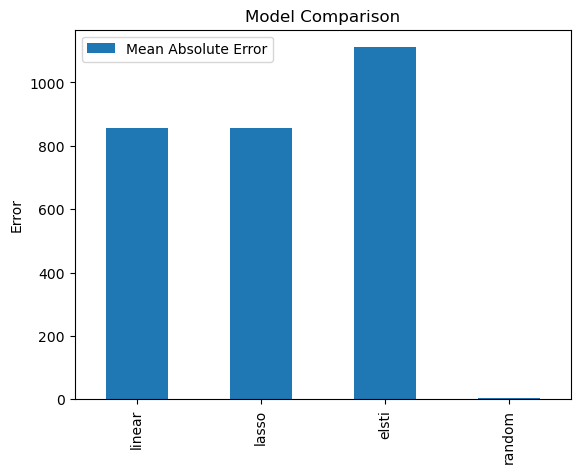

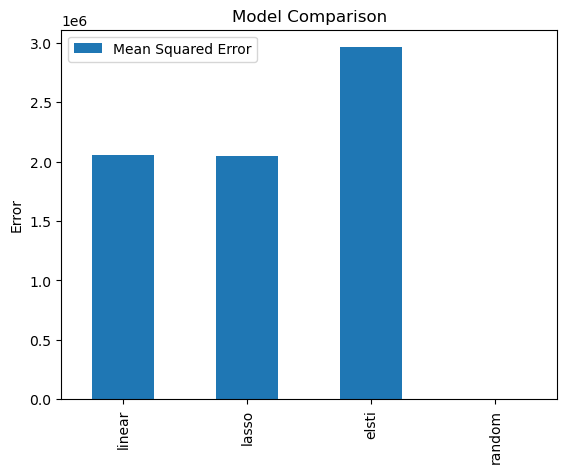

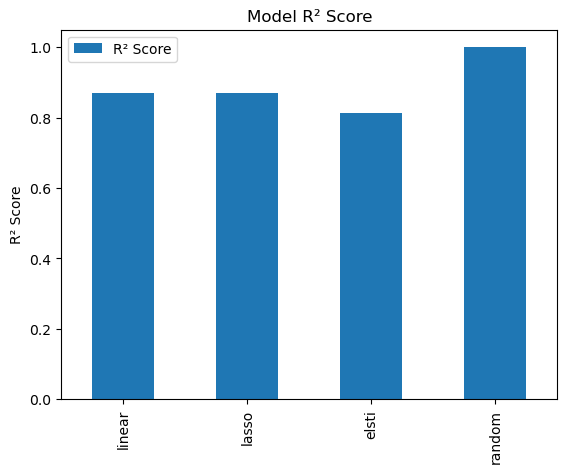

In [45]:
results_df[['Mean Absolute Error']].plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('Model Comparison')
plt.ylabel('Error')
plt.show()

results_df[['Mean Squared Error']].plot(kind='bar')
import matplotlib.pyplot as plt
plt.title('Model Comparison')
plt.ylabel('Error')
plt.show()

results_df[['R² Score']].plot(kind='bar')
plt.title('Model R² Score')
plt.ylabel('R² Score')
plt.show()